In [1]:
%matplotlib inline

In [2]:
from IPython.display import YouTubeVideo, Image
import matplotlib.pyplot as plt

# Problem Set 2

## Directions

1. Show all work/steps/calculations. Your submission should be a zip file named according to your JHED id ` <JHED>.zip` with the following contents:
    1. the .ipynb version of the notebook.
    2. the database, `contracts.db`
    3. the DDL file, `contracts.sql`
    3. your ETL code as `contracts.py`
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results. Explain your decisions.**

## Question 1 - Bad Charts

**Part 1.**

Based on the principles discussed in the Visualization Module and the Rules presented,

1. What do you think the main message or story of the chart is?
2. What are the chief problems with the following chart (what visualization principles does it violate)?
3. Present an alternative and describe why it is better (what visualization principles does your version follow)?

In [3]:
Image(url="http://skepchick.org/wp-content/uploads/2015/06/CNN-weed-chart.jpg")

1. The main message of this chart is the percentage of each age group which has tried weed. The main story is almost half (49%) of the age group 30-49 has tried weed
2. First of all, the graph makes people think they represents a percentage of a whole population while they don't add up to 100% and really means the percentage of each age group. Also, the use of weed logo is similar to pie chart which makes people hard to decode as people are worse at perceiving the difference in angles. Also, it makes comparison and contrast between groups harder. In addition, the proportion in the graph doesn't match the percentage. For examples, 36% and 17% on the graph seem to have the same size. Moreover, the use the the color is unnecessary as it doesn't provide any meaningful connections to the age group category.
3. The alternative would be a single colored bar chart with a bar for each age group representing the %of people who have tried weed. By doing so, it enable people to decode the graph precised and also lead to a better comparison among different age groups.

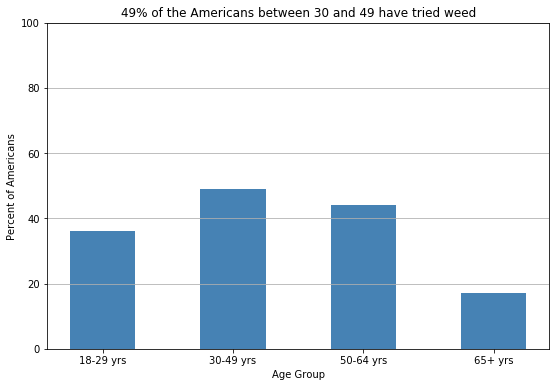

In [4]:
percent = [36.0, 49.0, 44.0, 17.0]
age_group = ["18-29 yrs","30-49 yrs","50-64 yrs", "65+ yrs"]
width = 1/2
figure = plt.figure(figsize=(9,6))
axes = figure.add_subplot(1,1,1)

axes.set_title( "49% of the Americans between 30 and 49 have tried weed")
axes.bar(range(0, len(percent)), percent, width, color="STEELBLUE", align="center")
axes.set_xticks(range(0, len(percent)))
axes.set_xticklabels(age_group)
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((0, 100))
axes.set_ylabel( "Percent of Americans")
axes.set_xlabel( "Age Group")

plt.show()

**Part 2.**

Based on the principles discussed in the Visualization Module and the Rules presented,

1. What are the chief problems with the following chart (what visualization principles does it violate)?
2. Present an alternative(s). Make whatever assumptions you need to make but explain them.

In [5]:
Image(url="http://www.essexrecordofficeblog.co.uk/wp-content/uploads/2015/01/Death-pie-chart.jpg")

*answer*

1. The main message of this chart is the percentage of deaths breaking down into age at death. The main story is 0-9 is the highest percentage age group.
2. First of all, the use of pie chart makes people hard to decode as people are worse at perceiving the difference in angles. Also, it makes comparison and contrast between groups harder. Also, there are too many categories for people to keep track of the compare. Last but not the least, the use of the colors are meaningless and make people hard to read the graph.
3. The alternative would be a single colored bar chart with a bar for each age group representing the % of deaths splitted by age at death. Also, I simplify the categories from 10 into 7 so it is easier for people to read it in terms of the life stage with categories limited. By doing so, it enable people to decode the graph precised and also lead to a better comparison among different life stage and thus understand the main story.

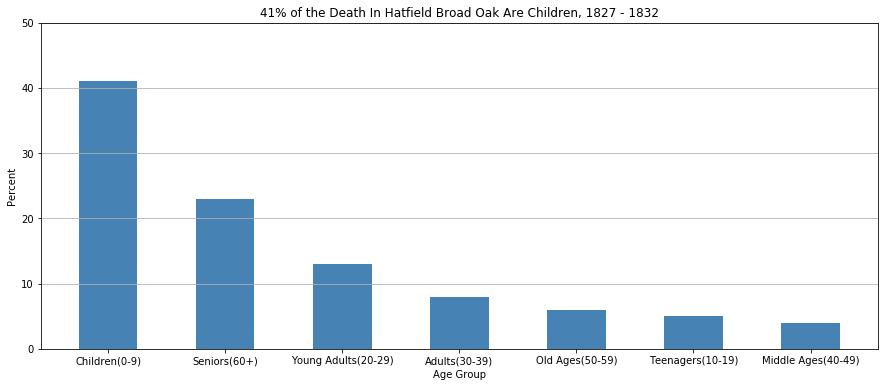

In [6]:
death3 = [41.0, 23.0, 13.0, 8.0, 6.0, 5.0, 4.0 ]
life_stage3 = ["Children(0-9)","Seniors(60+)","Young Adults(20-29)","Adults(30-39)","Old Ages(50-59)","Teenagers(10-19)","Middle Ages(40-49)"]

figure = plt.figure(figsize=(15,6))
axes = figure.add_subplot(1,1,1)

axes.set_title("41% of the Death In Hatfield Broad Oak Are Children, 1827 - 1832")
axes.bar(range(0, len(death3)), death3, width, color="STEELBLUE", align="center")
axes.set_xticks(range(0, len(death3)))
axes.set_xticklabels(life_stage3)
axes.yaxis.grid( b=True, which="major")
axes.set_ylim((0, 50))
axes.set_ylabel( "Percent")
axes.set_xlabel( "Age Group")

plt.show()
plt.close()


## Question 2 - Obtaining and Querying Data

In Lab 4, we obtained data from a Wikipedia page. This time we're going to start with a Wikipedia page but obtain and transform the supporting data.

1. View [Top 100 Contractors of the U.S. federal government](https://en.wikipedia.org/wiki/Top_100_Contractors_of_the_U.S._federal_government).
2. If you follow footnote 6, you can obtain the raw data for FY2015 which is an Excel file. The Excel file is divided into tabs. The first tab covers all the Federal government while the remaining tabs cover departments and sub-departments. **We are only interested in departments** which means we don't want spending from the first tab (although you may want the contractor information) and we don't want sub-departments. A department will have a code that ends with "00". For example, "9700" is the Defense Department but "9761" is "Defense Threat Reduction". We're not interested in the latter.
3. Create a SQLite3 database, `contracts.db`, of the department specific actions (contracts) and dollar amounts. It should have **two** tables. The first, `contractors`, should have an id (as a primary key) and a global_vendor_name (as a varchar). The second, `actions`, should include an id (primary key), department, actions (number of actions), dollars (dollars obligated) and contractor_id as a foreign key to the contractors table. Follow the same pattern as in the Lab. All your database and table creation (DDL) commands will be in `contracts.sql`.
4. Reading the Excel file and creating the database should be automated with no cutting and pasting so that you could regenerate the database for a corrected file or for FY2016 (assuming it had the same format). Both `xlrd` and `openpyxl` are included in Anaconda. (Translating the file from .xls to .xlsx *is* permitted but may not be required). Place this "ETL" code in a separate `contracts.py` file and include it with your submission.
5. After generating the database, connect to it and answer the 3 questions:

In [7]:
import pandas as pd
import sqlite3
#!python contracts.py
connection = sqlite3.connect('contracts.db')

In [8]:
query = '''SELECT * FROM contractors ORDER BY id'''
pd.read_sql(query,connection).head()

,id,global_vendor_name
0,0,CLEAN HARBORS INC
1,1,TYSON FOODS INC.
2,2,DEL MONTE PACIFIC LIMITED
3,3,JBS S/A.
4,4,BONGARDS' CREAMERIES


In [9]:
query = '''SELECT * FROM actions ORDER BY id '''
pd.read_sql(query,connection).head()

,id,actions,dollars,department,contractor_id
0,1200,38,3.060845e+08,Agriculture,0
1,1200,59,1.454674e+08,Agriculture,1
2,1200,99,1.157001e+08,Agriculture,2
3,1200,56,9.475670e+07,Agriculture,3
4,1200,55,9.264067e+07,Agriculture,4


**Questions**

1. What are the total actions and dollars obligated by department?
2. What is Johns Hopkins University's number of actions and dollars by department?
3. How many vendors received contracts from 1 department, 2 departments, etc? In other words, I want a table that looks like the following (numbers are absolutely made up):

| # Departments | Vendors |
|-------------|-----------|
| 1           | 1238      |
| 2           | 525       |
| 3           | 275       |
| ...         |           |
| n           | 2         |

Interpret the first two rows in words. What is the overall story? Now, using *percentages* (instead of these raw counts), make a chart that shows this story using the principles explored in class.

#### 1. What are the total actions and dollars obligated by department?

In [10]:
cursor = connection.cursor()
query = '''
SELECT department as 'Department', SUM(actions) as 'Total Actions', SUM(dollars) as 'Total Dollars'
FROM actions
GROUP BY department
;
'''
pd.read_sql(query,connection)

,Department,Total Actions,Total Dollars
0,Agriculture,9621,3.652094e+09
1,AirForce,42409,4.218775e+10
2,Army,43827,4.491044e+10
3,Commerce,5857,2.115698e+09
4,DoD,7139909,1.751856e+11
5,EPA,9115,1.128402e+09
6,Education,1844,2.567376e+09
7,Energy,4335,2.394702e+10
8,GSA,47825,5.961147e+09
9,Health&HumanServices,14107,1.494809e+10


#### 2. What is Johns Hopkins University's number of actions and dollars by department?

In [11]:
cursor = connection.cursor()
query = '''
SELECT department, actions, dollars
FROM actions INNER JOIN contractors ON contractors.id = actions.contractor_id
WHERE global_vendor_name LIKE 'Johns Hopkins University';
'''
pd.read_sql(query,connection)

,department,actions,dollars
0,Navy,959,5.494998e+08
1,Health&HumanServices,238,3.896801e+07
2,NASA,425,2.140475e+08
3,DoD,1536,7.610237e+08


3. How many vendors received contracts from 1 department, 2 departments, etc? In other words, I want a table that looks like the following (numbers are absolutely made up):

In [12]:
cursor = connection.cursor()
query = '''
SELECT department_contract_count, COUNT(contractor_id) AS 'vendor_count'
FROM
(SELECT contractor_id, COUNT(department) AS `department_contract_count`
FROM actions
GROUP BY `contractor_id`)
GROUP BY `department_contract_count`;
'''
df = pd.read_sql(query, connection)
pd.read_sql(query, connection)

,department_contract_count,vendor_count
0,1,1120
1,2,122
2,3,44
3,4,26
4,5,13
5,6,11
6,7,8
7,8,9
8,9,2
9,10,4


Interpret the first two rows in words. What is the overall story? 

There are 1120 vendors received contract from 1 department and there are 122 vendors received contracts from 2 department.
Overall, there are rarely one vendor received contract from more than 1 department. There might be restrictions for vendors to take contract from more than one department to avoid conflict of interest

Now, using percentages (instead of these raw counts), make a chart that shows this story using the principles explored in class.

0     0.816327
1     0.088921
2     0.032070
3     0.018950
4     0.009475
5     0.008017
6     0.005831
7     0.006560
8     0.001458
9     0.002915
10    0.002187
11    0.001458
12    0.000729
13    0.002187
14    0.001458
15    0.000729
16    0.000729
Name: vendor_count, dtype: float64


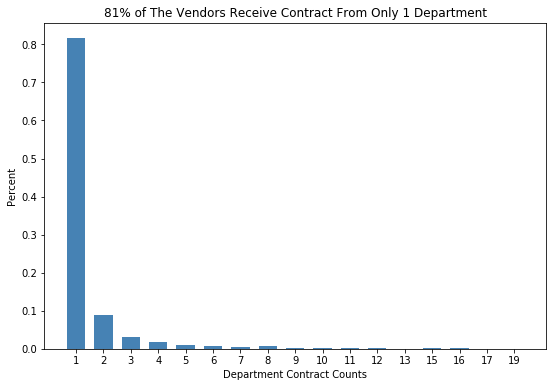

In [13]:
count = df["vendor_count"]
label = df["department_contract_count"]
proportions = count/sum(count)

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16, 17]
width = 1/1.5
figure = plt.figure(figsize=(9, 6))

axes = figure.add_subplot(1,1,1)
axes.bar(x, proportions, width, color="steelblue", align="center")
axes.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
axes.set_xticklabels(label)
axes.set_title( "81% of The Vendors Receive Contract From Only 1 Department")
axes.set_xlabel( "Department Contract Counts")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

print(proportions)